In [5]:
# Week 5
# Author : Venkata Kanaparthi
# Date : 4/17/2021

import scipy.stats

# Exercise 5-1

def EvalNormalCDF(x, mu=0, sigma=1):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

mu = 178
sigma = 7.7

# 5'10"
height5_10=EvalNormalCDF(177.8, mu, sigma)
# 6'1"
height6_1=EvalNormalCDF(185.4, mu, sigma)

print("height5_10: ",height5_10)
print("height6_1: ",height6_1)

# Between 5'10" and 6'1"
print(height6_1 - height5_10)

height5_10:  0.48963902786483265
height6_1:  0.8317337108107857
0.3420946829459531


In [7]:
# Exercise 5-2

alpha = 1.7
xmin = 1
dist = scipy.stats.pareto(b=alpha, scale=xmin)
print("Median: ", dist.median())

print("Mean: ",dist.mean())

print("Fraction of Population shorter than mean: ", dist.cdf(dist.mean()))

print("Taller than 1 km: ", (1 - dist.cdf(1000)) * 7e9)

print("Expect the tallest person to be: ", dist.sf(600000) * 7e9)

Median:  1.5034066538560549
Mean:  2.428571428571429
Fraction of Population shorter than mean:  0.778739697565288
Taller than 1 km:  55602.976430479954
Expect the tallest person to be:  1.0525455861201714


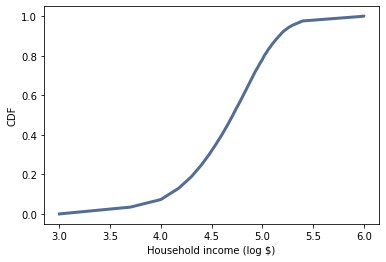

In [52]:
import hinc
import numpy as np
import thinkstats2
import thinkplot
from __future__ import print_function, division

%matplotlib inline

def Mean(xs):
    return RawMoment(xs, 1)

def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def Skewness(xs):
    return StandardizedMoment(xs, 3)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

def InterpolateSample(df, log_upper):    
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        #vals = np.linspace(row.log_lower, row.log_upper, int(abc))
        #vals = row.log_lower,"#",row.log_upper,"#",row.freq
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

income_df = hinc.ReadData()
#print(income_df)
log_upper = 6.0
log_sample = InterpolateSample(income_df, log_upper)
#print(log_sample)
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',ylabel='CDF')

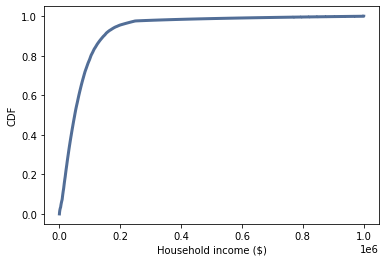

In [53]:
sample = np.power(10, log_sample)
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',ylabel='CDF')

In [54]:
# Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. 
# What fraction of households report a taxable income below the mean? 
# How do the results depend on the assumed upper bound?

print("Mean: ", Mean(sample)) 
print("Median:", Median(sample))
print("Skewness: ", Skewness(sample))
print("PearsonMedianSkewness: ", PearsonMedianSkewness(sample))
print("Fraction of households report a taxable income below the mean:", cdf.Prob(Mean(sample)))


Mean:  74278.70753118733
Median: 51226.45447894046
Skewness:  4.949920244429583
PearsonMedianSkewness:  0.7361258019141782
Fraction of households report a taxable income below the mean: 0.660005879566872
